Move the cells I used to calculate the tides from "Transport" so just read them in there

In [7]:
import arrow
import datetime
import matplotlib.pyplot as plt
import os
import xarray as xr

%matplotlib inline

In [12]:
basedir = '/results2/SalishSea/nowcast-green.201806/'
iY = 344; iX = 276; iZ = 10 

In [46]:
year = 2015
start = datetime.datetime(year, 1, 1)
endtime = datetime.datetime(year, 1, 2)
timerange = arrow.Arrow.range('day', start, endtime)
for i, day in enumerate(timerange):
    dir1 = day.format('DDMMMYY').lower()
    ymd = day.format('YYYYMMDD')
    filename = 'SalishSea_1h_'+ymd+'_'+ymd+'_grid_U.nc'
    fullfile = os.path.join(basedir, dir1, filename)
    u_vel = xr.open_dataset(fullfile)
    velocity = u_vel['vozocrtx'].isel(y=iY, x=iX).sel(depthu=iZ, method='nearest')
    u_vel.close()
    if i == 0:
        velocity_year = velocity.copy(deep=True)
        velocity.close()
    else:
        print (velocity)
        print (velocity_year)
        velocity_year = xr.concat(velocity_year, velocity, dim='time_counter') 
        print ('Second Time')
        print (velocity_year)
    
    

<xarray.DataArray 'vozocrtx' (time_counter: 24)>
array([-1.309047, -1.353753, -1.475075, -1.35125 , -0.888172, -0.095862,
        0.214601,  1.204248,  1.292351,  1.49255 ,  1.122211,  0.79738 ,
        0.256181, -0.229652, -0.756323, -0.781566, -0.538273, -0.216132,
        0.067654,  0.197514,  0.128071,  0.035463, -0.397566, -0.784708],
      dtype=float32)
Coordinates:
    nav_lat        float32 ...
    nav_lon        float32 ...
    depthu         float32 9.502433
    time_centered  (time_counter) datetime64[ns] ...
  * time_counter   (time_counter) datetime64[ns] 2015-01-02T00:30:00 ... 2015-01-02T23:30:00
Attributes:
    standard_name:       sea_water_x_velocity
    long_name:           ocean current along x-axis
    units:               m/s
    online_operation:    average
    interval_operation:  40 s
    interval_write:      1 h
    cell_methods:        time: mean (interval: 40 s)
    cell_measures:       area: area
<xarray.DataArray 'vozocrtx' (time_counter: 24)>
array([-1.2

TypeError: concat() got multiple values for argument 'dim'

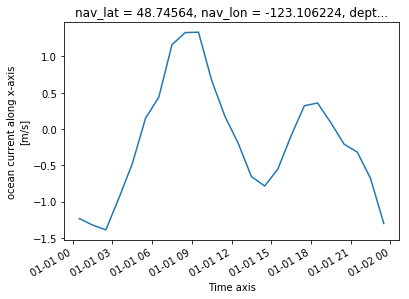

In [38]:
velocity_year.plot()

In [2]:
u_vel   = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DuGridFields1hV17-02')
iY = 344; iX = 276; iZ = 10 
velocity2015 = u_vel.uVelocity.sel(time ='2015', depth=iZ, gridX=iX, gridY=iY, method='nearest')
velocity2016 = u_vel.uVelocity.sel(time ='2016', depth=iZ, gridX=iX, gridY=iY, method='nearest')
velocity2017 = u_vel.uVelocity.sel(time ='2017', depth=iZ, gridX=iX, gridY=iY, method='nearest')

RuntimeError: NetCDF: DAP failure

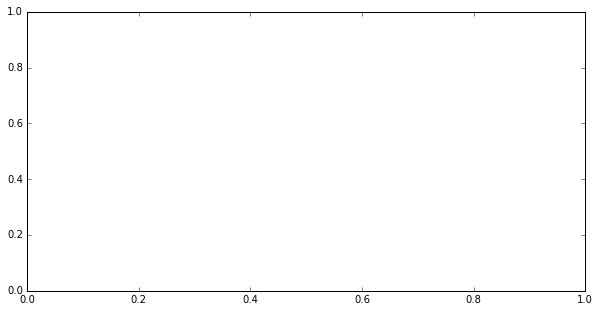

In [6]:
# Yes, do run this.  Its gets the data which makes the next cell happy.
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
velocity2015.plot()
velocity2016.plot()
velocity2017.plot()

In [ ]:
velocity = xr.concat([velocity2015, velocity2016], dim='time')
velsquared = velocity * velocity
day_avg_tide_vel = velsquared.resample('1D', dim='time', how='mean')

In [ ]:
day_avg_tide_pd = day_avg_tide_vel.to_dataframe()
day_avg_tide_pd = day_avg_tide_pd.drop('depth', 1)
day_avg_tide_pd = day_avg_tide_pd.drop('gridY', 1)
day_avg_tide_pd = day_avg_tide_pd.drop('gridX', 1)
day_avg_tide_pd.to_csv('day_avg_tide_pd.csv')

In [ ]:
low_pass_tide = pd.rolling_mean(day_avg_tide_pd, 4, center=True)
low_pass_tide.to_csv('low_pass_tide.csv')
low_pass_tide.plot()